<a href="https://colab.research.google.com/github/gapself/machine-learning/blob/main/image-recognition-projects/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZUM 3

In [ ]:
from keras.datasets import cifar10 as dataset
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [ ]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)


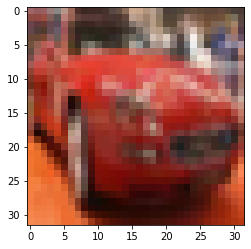

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  [154 124 122]
  [138 134 131]
  [184 149 137]
  [154 103  88]
  [ 77  46  40]
  [ 61  39  35]
  [ 64  42  37]
  [ 65  43  38]
  [ 70  50  46]
  [ 88  71  66]
  [102  80  68]
  [139 110  89]
  [203 169 143]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  [128  94  90]
  [ 91  85  85]
  [184 126 119]
  [152  97  81]
  [100  66  60]
  [ 86  57  55]
  [ 86  57  54]
  [ 87  58  55]
  [ 77  51  48]
  [ 73  53  49]
  [ 76  54  46]
  [ 95  72  59]
  [186 160 144]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  [105  73  80]
  [ 93  74  86]
  [164  95  96]
  [101  69  53]
  [ 60  44  36]
  [ 59  37  32]
  [ 60  38  33]
  [ 68  46  41]
  [ 63  42  38]
  [ 63  44  40]
  [ 71  53  47]
  [ 79  63  57]
  [132 115 107]]

 [[100  70  76]
  [ 81  60  57]
  [ 82  57  45]
  [101  77  84]
  [105  91 103]
  [156  84  88]
  [ 85  56  46]
  [ 46  36  31]
  [ 45  38  28]
  [ 42  35  25]
  [ 45  38  28]
  [ 49  38  30]
  [ 49  33  29]
  [ 52  38  33]
  

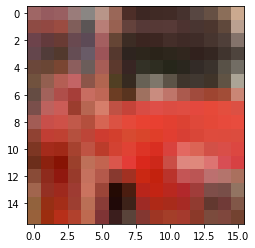

In [ ]:
image_slice = X_train[5][0:16,0:16]
print(image_slice)
plt.imshow(image_slice)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


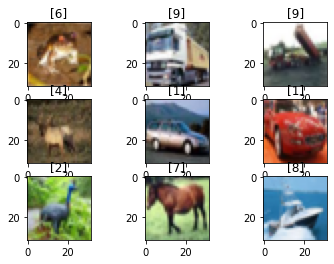

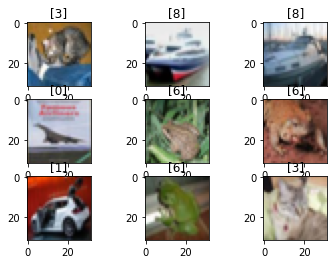

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
plt.show()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_test[i])
  plt.imshow(X_test[i])
plt.show()

#SVM

In [ ]:
train_count = 10000
X_train = X_train[0:train_count]
y_train = y_train[0:train_count]

np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1005,  974, 1032, 1016,  999,  937, 1030, 1001, 1025,  981]))

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='poly', gamma=0.1)
classifier.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, kernel='poly')

In [ ]:
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 32*32*3))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.4166
[[504  84  98  42  61  37  30  64 130  80]
 [ 37 488  14  32  27  14  17  39  85 216]
 [ 86  33 355 147 191 122 140  87  39  15]
 [ 35  47  95 295  95 216 152  83  32  43]
 [ 44  27 141  70 371  87 140 107  32  26]
 [ 22  33  84 180  63 326  56  87  22  31]
 [ 18  19  95 103  85  66 402  30   9  24]
 [ 34  25  71  51  70  75  28 443  21  58]
 [173  82  30  40  27  35  15  17 576 101]
 [ 47 162  17  40  10  22  20  43  54 406]]


#KLASYFIKACJA CNN

In [ ]:
from keras.datasets import cifar10 as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [ ]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(type(X_train[0][0][0][0]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train[0][0][0][0]))

<class 'numpy.float64'>
<class 'numpy.float32'>


##### kolejny krok - przygotowanie etykiet.
##### ćwicząc SVM mieliśmy 10 różnych klas. SVM podzielił przestrzeń wielowymiarową (wymiary=atrybuty) aby móc coś oddzielić od siebie np obiekty należące do 2 klas (np. cukrzyk lub nie). te przestrzenie dzielimy sobie jedną kreską/krzwą, gdy pojawia się wiele klas trzeba troszkę kombinować :D aby móc więcej klas sklasyfikować a nie tylko 2.
tyle ile będzie klas = na końcu neuronów będzie tyle samo.
np 2 klasy = 2 neurony (kazdy ze swoim scorem)
####input >> hidden layer >> output layer
żeby zdecydować do jakiej klasy należy wrzucone przez nas do sieci neuronowej zdjęcie - trzeba bedzie spojrzać na output ostatnich neuronów. neuron z wysokim scorem - wygrywa (on stwierdzi za jaką pewnością np. 1 to 1)
##### output zdjęcia: [0.1 0.2 0.4 ... 0.7 0.1] gdzie len=10 --> max score = 0.7 , więc zwycięzca to cyfra 8, bo to przedostatni neuron, który odpowiada 8semce.
##### [1000] --> score dla cyfry 0, poprawne klasy 1, niepop 0
### przekonwertowanie: etykieta >>> wektor, porównanie wektor + wynik
#### beznadziejna sieć, gdy [100000] a wynik [0.1 0.2 0.3 ... 0.8]

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train) #wektor macierzy a nie wektor liczby
Y_test = np_utils.to_categorical(y_test)

##### dane w postaci obrazków 3wymiar(nie 2wuwymiarowych)
##### 2 x 2 px ==> rgb rgb rgb rgb ---> 2 x 2 x 3 / rrrr gggg bbbb

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

## Przygotowanie sieci

In [ ]:
Y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
# 1wszy arg = liczba filtrów: 32, wielkość filtra: 3x3 (domyślnie ogarnie 3x3x32)
# funkcja aktywacji ReLu
# input_shape = (wyżej zaanotowaliśmy) =np (3, 32, 32)
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##Trening

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 2s 7ms/step - loss: 1.6806 - accuracy: 0.3946
Epoch 2/20
196/196 [==============================] - 1s 7ms/step - loss: 1.3751 - accuracy: 0.5078
Epoch 3/20
196/196 [==============================] - 1s 7ms/step - loss: 1.2500 - accuracy: 0.5580
Epoch 4/20
196/196 [==============================] - 1s 7ms/step - loss: 1.1634 - accuracy: 0.5899
Epoch 5/20
196/196 [==============================] - 1s 7ms/step - loss: 1.1019 - accuracy: 0.6142
Epoch 6/20
196/196 [==============================] - 1s 7ms/step - loss: 1.0377 - accuracy: 0.6373
Epoch 7/20
196/196 [==============================] - 1s 7ms/step - loss: 0.9947 - accuracy: 0.6531
Epoch 8/20
196/196 [==============================] - 1s 7ms/step - loss: 0.9507 - accuracy: 0.6687
Epoch 9/20
196/196 [==============================] - 1s 7ms/step - loss: 0.9177 - accuracy: 0.6795
Epoch 10/20
196/196 [==============================] - 1s 7ms/step - loss: 0.8778 - accuracy: 0.6939

## Ewaluacja

In [ ]:
scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9079 - accuracy: 0.6922


In [ ]:
print(scores[1])

0.6922000050544739


In [ ]:
# model.predict (_classes), zapiszmy sobie do wektora y_pred
y_pred = model.predict(X_test) #wektory dla wszystkich neuronów, kazdy teraz dostaje 10 wejsc
y_pred = np.argmax(y_pred, axis=1) #wybieramy te, ktore maja najwieksza wartosc
print(y_pred[:20])
print(y_test[:20].T)

[3 8 1 0 6 6 1 6 3 1 4 9 5 7 9 8 5 4 8 6]
[[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]]


In [ ]:
#spr konkret instancje
false_pred = np.nonzero(y_pred != y_test)[1]
print(false_pred[0:10])

[ 1  2  3  4  5  6  7  9 10 11]


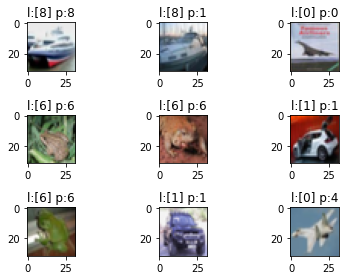

In [ ]:
#rysujemy instancje, gdzie sobie nie poradził
import matplotlib.pyplot as plt

for i in range(9):
  instance_index = false_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32, 32, 3))
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))

## Zbiór walidacyjny + early stopping 

In [ ]:
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10 as dataset
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
monitor = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 2s 10ms/step - loss: 1.7241 - accuracy: 0.3782 - val_loss: 1.4786 - val_accuracy: 0.4890
Epoch 2/20
176/176 [==============================] - 1s 8ms/step - loss: 1.3941 - accuracy: 0.5012 - val_loss: 1.2936 - val_accuracy: 0.5468
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 1.2593 - accuracy: 0.5538 - val_loss: 1.2060 - val_accuracy: 0.5772
Epoch 4/20
176/176 [==============================] - 1s 8ms/step - loss: 1.1718 - accuracy: 0.5882 - val_loss: 1.1455 - val_accuracy: 0.6058
Epoch 5/20
176/176 [==============================] - 1s 8ms/step - loss: 1.0987 - accuracy: 0.6127 - val_loss: 1.1014 - val_accuracy: 0.6182
Epoch 6/20
176/176 [==============================] - 1s 8ms/step - loss: 1.0556 - accuracy: 0.6325 - val_loss: 1.0330 - val_accuracy: 0.6438
Epoch 7/20
176/176 [==============================] - 1s 7ms/step - loss: 1.0048 - accuracy: 0.6506 - val_loss: 1.0075 - val_accuracy: 0.6572
Epoch

In [ ]:
scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9142 - accuracy: 0.6910


In [ ]:
print(scores[1])

0.6909999847412109


#### Kolejnym krokiem jest próba poprawienia wyniku. Spróbuj wprowadzić modyfikacje (np. dodawanie, usuwanie lub modyfikacja warstw Conv2D, Dense, Pooling, dodanie Dropoutu, modyfikacja hiperparametrów, itd.) do sieci, które mogłyby poprawić jej skuteczność. Stwórz co najmniej 3 takie sieci i opisz wprowadzone w nich zmiany.

# 1 poprawa wyników

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model_1 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.5),
  Flatten(),  # this converts our 3D feature maps to 1D feature vectors
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, restore_best_weights=True, verbose=1, mode="auto")
monitor = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 2s 9ms/step - loss: 1.7636 - accuracy: 0.3594 - val_loss: 1.4522 - val_accuracy: 0.4782
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 1.4339 - accuracy: 0.4859 - val_loss: 1.2972 - val_accuracy: 0.5414
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 1.3248 - accuracy: 0.5275 - val_loss: 1.2018 - val_accuracy: 0.5782
Epoch 4/20
176/176 [==============================] - 1s 7ms/step - loss: 1.2541 - accuracy: 0.5555 - val_loss: 1.1542 - val_accuracy: 0.6000
Epoch 5/20
176/176 [==============================] - 1s 8ms/step - loss: 1.2073 - accuracy: 0.5739 - val_loss: 1.0974 - val_accuracy: 0.6222
Epoch 6/20
176/176 [==============================] - 1s 7ms/step - loss: 1.1591 - accuracy: 0.5936 - val_loss: 1.0497 - val_accuracy: 0.6408
Epoch 7/20
176/176 [==============================] - 1s 8ms/step - loss: 1.1244 - accuracy: 0.6043 - val_loss: 1.0297 - val_accuracy: 0.6412
Epoch 

In [ ]:
scores = model_1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8605 - accuracy: 0.7052


In [ ]:
print(scores[1])

0.7052000164985657


#### Wynik zmienił się z ~0.69 na ~0.71

#### W tej konfiguracji użyłam Droputu. Zastosowanie dropout w praktyce prowadzi do sytuacji, w której architektura sieci zmienia się dynamicznie i otrzymujemy model, w którym jeden zbiór danych został wykorzystany do nauczenia wielu sieci o różniących się architekturach, a następnie został przetestowany na zbiorze testowym z uśrednionymi wartościami wag. Użycie dropout w Keras sprowadza się do dodania kolejnej warstwy o nazwie Dropout(rate), której hiperparametrem jest prawdopodobieństwo, z jakim neuron zostanie usunięty z sieci.



# 2 poprawa wyników

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

model_2 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  BatchNormalization(),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  BatchNormalization(),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),

  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.15),
  Dense(10, activation='softmax')
])

In [ ]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_2.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 4s 19ms/step - loss: 1.5368 - accuracy: 0.4472 - val_loss: 2.6225 - val_accuracy: 0.2066
Epoch 2/20
176/176 [==============================] - 3s 18ms/step - loss: 1.1229 - accuracy: 0.6016 - val_loss: 2.4723 - val_accuracy: 0.2982
Epoch 3/20
176/176 [==============================] - 3s 16ms/step - loss: 0.9388 - accuracy: 0.6707 - val_loss: 1.3366 - val_accuracy: 0.5450
Epoch 4/20
176/176 [==============================] - 3s 16ms/step - loss: 0.8264 - accuracy: 0.7097 - val_loss: 0.8900 - val_accuracy: 0.6892
Epoch 5/20
176/176 [==============================] - 3s 16ms/step - loss: 0.7378 - accuracy: 0.7424 - val_loss: 0.8719 - val_accuracy: 0.6984
Epoch 6/20
176/176 [==============================] - 3s 16ms/step - loss: 0.6698 - accuracy: 0.7648 - val_loss: 0.7847 - val_accuracy: 0.7330
Epoch 7/20
176/176 [==============================] - 3s 16ms/step - loss: 0.6153 - accuracy: 0.7845 - val_loss: 0.7782 - val_accuracy: 0.7314

In [ ]:
scores = model_2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8906 - accuracy: 0.7380


In [ ]:
print(scores[1])

0.7379999756813049


###Wynik zmienił się z ~0.69 na ~0.74

### Tym razem w warstwie konwolucyjnej zastosowałam dodatkowo normalizację batchową. Przy okazji podwoiłam warstwy Conv2D, BatchNormalization() i Pooling.



#3 poprawa wyników

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers

model_3 = Sequential([    
  Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.4),

  Flatten(),  # this converts our 3D feature maps to 1D feature vectors
  Dense(128, activation='relu'),
  Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

In [ ]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_3.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 2s 10ms/step - loss: 1.8430 - accuracy: 0.3684 - val_loss: 1.5238 - val_accuracy: 0.4706
Epoch 2/20
176/176 [==============================] - 1s 8ms/step - loss: 1.4776 - accuracy: 0.4893 - val_loss: 1.3676 - val_accuracy: 0.5268
Epoch 3/20
176/176 [==============================] - 2s 9ms/step - loss: 1.3515 - accuracy: 0.5358 - val_loss: 1.2467 - val_accuracy: 0.5824
Epoch 4/20
176/176 [==============================] - 2s 9ms/step - loss: 1.2702 - accuracy: 0.5635 - val_loss: 1.1680 - val_accuracy: 0.6176
Epoch 5/20
176/176 [==============================] - 2s 9ms/step - loss: 1.2026 - accuracy: 0.5888 - val_loss: 1.1209 - val_accuracy: 0.6202
Epoch 6/20
176/176 [==============================] - 1s 8ms/step - loss: 1.1564 - accuracy: 0.6064 - val_loss: 1.0981 - val_accuracy: 0.6308
Epoch 7/20
176/176 [==============================] - 1s 8ms/step - loss: 1.1084 - accuracy: 0.6213 - val_loss: 1.0434 - val_accuracy: 0.6530
Epoch

In [ ]:
scores = model_3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8131 - accuracy: 0.7311


In [ ]:
print(scores[1])

0.7311000227928162


###Wynik zmienił się z ~0.69 na ~0.73

###Tym razem użyłam regularyzacji wag normą L2 do warstwy gęstej tj. do warstwy "karę", aby ich wartości były mniejsze.

### Użyłam 3 Convolutional layers (w tym z filtrem = 64), po których następują warstwy MaxPooling. Warstwa dropout jest tym razem dodana po 3. operacji maxpool, aby uniknąć nadmiernego dopasowania.
